In [102]:
!nvidia-smi

Thu Jul 25 13:03:31 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.73.01    Driver Version: 512.78       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0  On |                  N/A |
| N/A   50C    P8     2W /  N/A |    627MiB /  4096MiB |     17%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Imports**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# **Load Dataset**

In [2]:
df = pd.read_csv('./data/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
x = df.drop('price_range', axis=1)
y = df['price_range']
x.shape, y.shape

((2000, 20), (2000,))

# **Split**

## Method 1

In [4]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, train_size=0.7, random_state=42)

In [5]:
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
836,902,1,0.6,1,0,0,63,0.7,122,5,14,364,1360,3654,18,8,15,0,1,1
575,1197,1,0.5,1,9,0,20,0.1,129,5,10,214,1710,2885,19,7,14,1,1,1
557,1519,0,2.1,0,0,0,32,0.7,200,1,10,168,1239,2912,11,10,15,1,1,0
1235,1971,1,0.5,1,0,0,40,0.3,186,7,19,485,922,571,8,7,17,1,1,0
1360,882,0,0.7,1,9,1,28,0.2,151,6,16,248,884,751,19,11,8,1,0,1


In [6]:
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((1400, 20), (600, 20), (1400,), (600,))

# **Preprocess**

## Convert to tensor

### Train

In [8]:
x_train = torch.FloatTensor(x_train.values)
y_train = torch.LongTensor(y_train.values)

### Validation

In [9]:
x_valid = torch.FloatTensor(x_valid.values)
y_valid = torch.LongTensor(y_valid.values)

## Standardization

In [10]:
mu = x_train.mean(dim=0)
std = x_train.std(dim=0)
mu, std

(tensor([1.2403e+03, 4.9357e-01, 1.5257e+00, 5.2357e-01, 4.2664e+00, 5.2786e-01,
         3.2241e+01, 5.0671e-01, 1.4064e+02, 4.5664e+00, 9.9000e+00, 6.3942e+02,
         1.2463e+03, 2.1226e+03, 1.2185e+01, 5.6521e+00, 1.0949e+01, 7.6429e-01,
         5.0429e-01, 4.9929e-01]),
 tensor([4.4307e+02, 5.0014e-01, 8.2512e-01, 4.9962e-01, 4.3234e+00, 4.9940e-01,
         1.8257e+01, 2.8797e-01, 3.5326e+01, 2.2958e+00, 6.0214e+00, 4.3995e+02,
         4.3039e+02, 1.0827e+03, 4.2240e+00, 4.3647e+00, 5.4904e+00, 4.2460e-01,
         5.0016e-01, 5.0018e-01]))

In [11]:
x_train = (x_train - mu) / std
x_valid = (x_valid - mu) / std

In [12]:
x_train.mean(dim=0), x_train.std(dim=0)

(tensor([ 7.4250e-08,  3.4741e-08,  2.8951e-08, -8.1744e-09,  2.9291e-08,
          7.0163e-08, -3.8828e-08,  9.5367e-09,  2.0572e-07, -3.8147e-08,
          5.6880e-08,  1.7030e-10,  1.3965e-07, -8.5149e-09, -7.9019e-08,
         -3.6444e-08,  4.7003e-08, -1.0490e-07,  6.8120e-09,  2.7248e-08]),
 tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000]))

# **Dataloader**

## Train

In [66]:
train_dataset = TensorDataset(x_train, y_train)

In [67]:
train_dataset.tensors[0]

tensor([[-0.7636,  1.0126, -1.1219,  ..., -1.8000,  0.9911,  1.0011],
        [-0.0978,  1.0126, -1.2431,  ...,  0.5551,  0.9911,  1.0011],
        [ 0.6289, -0.9869,  0.6960,  ...,  0.5551,  0.9911, -0.9982],
        ...,
        [ 1.3286,  1.0126, -1.2431,  ...,  0.5551, -1.0082,  1.0011],
        [ 1.5498, -0.9869, -0.7583,  ..., -1.8000,  0.9911,  1.0011],
        [-1.3662,  1.0126, -1.1219,  ...,  0.5551, -1.0082, -0.9982]])

In [68]:
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)

In [69]:
len(train_loader)

14

In [70]:
train_loader.batch_size

100

In [71]:
train_loader.drop_last

False

In [72]:
x_batch, y_batch = next(iter(train_loader))
x_batch.shape, y_batch.shape

(torch.Size([100, 20]), torch.Size([100]))

## Validation

In [73]:
valid_dataset = TensorDataset(x_valid, y_valid)
valid_loader = DataLoader(valid_dataset, batch_size=200, shuffle=False)

# **Model**

In [114]:
num_feats = 20
num_class = 4

h1 = 64
h2 = 32

model = nn.Sequential(
    nn.Linear(num_feats, h1),
    nn.ReLU(),
    nn.Linear(h1, h2),
    nn.ReLU(),
    nn.Linear(h2, num_class)
)

In [75]:
yp = model(x_batch)

In [76]:
yp[:2, :]

tensor([[-0.0045,  0.2135,  0.0919,  0.1894],
        [-0.0352,  0.1662,  0.1517,  0.3521]], grad_fn=<SliceBackward0>)

In [77]:
torch.tensor([torch.numel(p) for p in model.parameters()]).sum()

tensor(3556)

# **Loss & Optimizer**

In [115]:
loss_fn = nn.CrossEntropyLoss()
# nn.BCELoss()
# nn.BCEWithLogitsLoss  # with Sigmoid
optimizer = optim.SGD(model.parameters(), lr=0.01)

# **Device**

In [99]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [116]:
model = model.to(device)

In [117]:
model[0].weight

Parameter containing:
tensor([[-0.1264, -0.0673, -0.0517,  ..., -0.1020,  0.1701,  0.0674],
        [-0.1758,  0.1940, -0.1859,  ..., -0.0524,  0.1455,  0.1583],
        [-0.1157, -0.1553,  0.0782,  ...,  0.0870, -0.0009,  0.1956],
        ...,
        [ 0.0248,  0.1455, -0.1082,  ...,  0.0847, -0.2045,  0.2140],
        [-0.1175, -0.1297,  0.1720,  ...,  0.0185, -0.0202, -0.1274],
        [ 0.1130,  0.1770,  0.1319,  ...,  0.1680, -0.1424, -0.0063]],
       device='cuda:0', requires_grad=True)

# **Utils**

## Loss

In [79]:
class AverageMeter(object):
    """Computes and stores the average and current value"""

    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [33]:
loss_meter = AverageMeter()

In [80]:
loss_meter.update(1.)

In [81]:
loss_meter.update(3.)

In [82]:
loss_meter.sum, loss_meter.avg

(8.0, 2.0)

## Torchmetrics

In [83]:
from torchmetrics import Accuracy

In [84]:
target = torch.tensor([0, 1, 2, 3])
preds = torch.tensor([0, 2, 1, 3])

In [85]:
acc = Accuracy(task='multiclass', num_classes=4)
acc

MulticlassAccuracy()

In [86]:
acc(preds, target)

tensor(0.5000)

# **Train Loooop!**

In [118]:
num_epochs = 400

loss_train_hist = []
loss_valid_hist = []

acc_train_hist = []
acc_valid_hist = []

for epoch in range(num_epochs):
    loss_train = AverageMeter()
    acc_train = Accuracy(task='multiclass', num_classes=num_class).to(device)
    for i, (inputs, targets) in enumerate(train_loader):
        inputs = inputs.to(device)
        targets = targets.to(device)

        outputs = model(inputs)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        loss_train.update(loss.item())
        acc_train(outputs, targets)

    with torch.no_grad():
        loss_valid = AverageMeter()
        acc_valid = Accuracy(task='multiclass', num_classes=num_class).to(device)
        for i, (inputs, targets) in enumerate(valid_loader):
            inputs = inputs.to(device)
            targets = targets.to(device)

            outputs = model(inputs)
            loss = loss_fn(outputs, targets)

            loss_valid.update(loss.item())
            acc_valid(outputs, targets)

    loss_train_hist.append(loss_train.avg)
    loss_valid_hist.append(loss_valid.avg)

    acc_train_hist.append(acc_train.compute().cpu())
    acc_valid_hist.append(acc_valid.compute().cpu())

    if epoch % 50 == 0:
        print(f'Epoch: {epoch}, Train Loss: {loss_train.avg:.4f}, Train Acc: {acc_train.compute():.4f}, Valid Loss: {loss_valid.avg:.4f}, Valid Acc: {acc_valid.compute():.4f}')

Epoch: 0, Train Loss: 1.3857, Train Acc: 0.2536, Valid Loss: 1.3809, Valid Acc: 0.2700
Epoch: 50, Train Loss: 0.9099, Train Acc: 0.6264, Valid Loss: 0.9056, Valid Acc: 0.6400
Epoch: 100, Train Loss: 0.4566, Train Acc: 0.9043, Valid Loss: 0.4626, Valid Acc: 0.8883
Epoch: 150, Train Loss: 0.2702, Train Acc: 0.9557, Valid Loss: 0.2954, Valid Acc: 0.9150
Epoch: 200, Train Loss: 0.1826, Train Acc: 0.9707, Valid Loss: 0.2260, Valid Acc: 0.9267
Epoch: 250, Train Loss: 0.1351, Train Acc: 0.9793, Valid Loss: 0.1945, Valid Acc: 0.9350
Epoch: 300, Train Loss: 0.1054, Train Acc: 0.9857, Valid Loss: 0.1795, Valid Acc: 0.9283
Epoch: 350, Train Loss: 0.0849, Train Acc: 0.9900, Valid Loss: 0.1719, Valid Acc: 0.9267


In [93]:
# torch.sum(outputs.argmax(dim=1) == targets), targets.shape

# **Plot**

## Loss

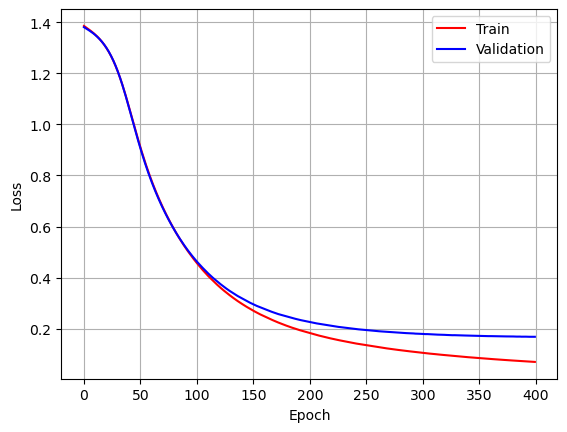

In [119]:
plt.plot(range(num_epochs), loss_train_hist, 'r-', label='Train')
plt.plot(range(num_epochs), loss_valid_hist, 'b-', label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

## Accuracy

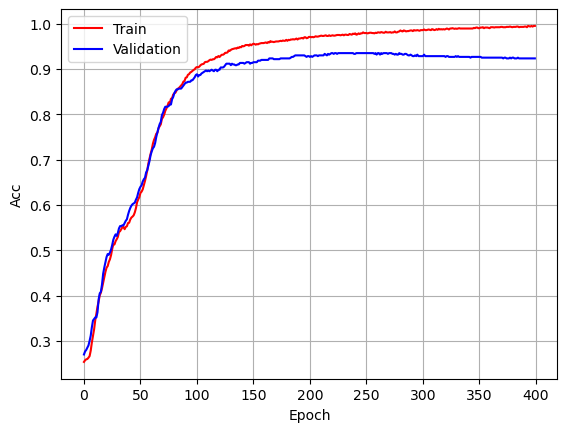

In [120]:
plt.plot(range(num_epochs), acc_train_hist, 'r-', label='Train')
plt.plot(range(num_epochs), acc_valid_hist, 'b-', label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.grid(True)
plt.legend()

# **Save model**

In [121]:
torch.save(model, './out/model.pth')

In [122]:
torch.load('./out/model.pth')

Sequential(
  (0): Linear(in_features=20, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=4, bias=True)
)